# Import the Data

## - extract the data as dataframe

In [2]:
# to mute the warning message from SQLAlchemy
import os
os.environ['SQLALCHEMY_SILENCE_UBER_WARNING'] = '1'

from sqlalchemy import create_engine
import pandas as pd

# creates a SQLAlchemy engine
engine = create_engine("sqlite:///data/failure.db")

# connects it to the local database file
connection = engine.connect()

# import the data from the database
result = connection.execute("SELECT * FROM failure")

# save the data into a Pandas dataframe
df = pd.DataFrame(result.fetchall())

# close the connection
connection.close()

## - preview the data

These steps are taken iteratively together with the data preparation steps. It helps to check the validity of our assumptions on the data, and ensure our data cleanzing steps are as we desired.

In [523]:
# total dataset size
df.shape[0]

10081

In [524]:
# sample a few
df[200:210]

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
200,a6653396-ee56-4525-b10c-f8a7875b3880,"Model 3, 2017",White,110.4 °C,1609,"Shang Hai, China",Low,629.2,Premium,0,0,0,0,0
201,3ea04f69-7119-4a78-8a5c-5bffc7010967,"Model 3, 2017",White,230.7 °F,1575,"New York, U.S",High,680.9,None,0,0,0,0,0
202,36bad299-78ec-4660-bb8e-e97e6ae27620,"Model 5, 2017",White,230.8 °F,1636,"New York, U.S",Medium,737.8,Normal,0,0,0,0,0
203,c08df616-29da-41eb-b522-fb5f09efd011,"Model 3, 2016",Red,110.4 °C,1490,"Shang Hai, China",Low,600.8,Premium,1,0,0,0,0
204,0de6238a-d6a4-422d-84db-fb12f40c01d4,"Model 3, 2016",White,110.4 °C,1741,"Shang Hai, China",High,617.5,None,0,0,0,0,0
205,d77d76e1-19ec-44d8-9ee9-48495b45e82e,"Model 5, 2016",Blue,110.4 °C,1344,"Shang Hai, China",Low,679.4,Normal,0,0,0,0,0
206,7bd60000-42f4-48cd-af70-d18bd40dc298,"Model 3, 2016",White,110.4 °C,1609,"Shang Hai, China",High,691.8,Normal,0,0,0,0,0
207,9e3c90e3-c311-4d6e-83fb-7a3419dcbc43,"Model 5, 2016",White,110.4 °C,1421,"Shang Hai, China",Medium,752.4,None,0,0,0,0,1
208,c870bbdd-820f-4b82-b238-33635ff7d79f,"Model 3, 2016",White,110.4 °C,1591,"Shang Hai, China",Low,630.5,None,0,0,0,0,0
209,83d5cffa-6d8b-476b-9c55-20028676c42f,"Model 3, 2016",Red,110.4 °C,1477,"Shang Hai, China",Medium,618.6,Normal,0,0,0,0,0


In [525]:
# what are the quantitative columns there, eyeballing for inbalance
df.describe()

,RPM,Fuel consumption,Failure A,Failure B,Failure C,Failure D,Failure E
count,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000,10081.000000
mean,1470.626823,679.472304,0.025692,0.018550,0.031049,0.024502,0.026386
std,487.502419,58.486101,0.158222,0.134935,0.173457,0.154608,0.160289
min,-2636.000000,598.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1418.000000,638.800000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1499.000000,668.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1609.000000,704.200000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2886.000000,904.800000,1.000000,1.000000,1.000000,1.000000,1.000000


In [526]:
# what are the categorical columns there, should be empty by the end of encoding
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['Car ID', 'Model', 'Color', 'Temperature', 'Factory', 'Usage',
       'Membership'],
      dtype='object')

In [527]:
# what are the unique values in them, eyeballing for inbalance
for column in [col for col in categorical_columns]:
    print(df[column].value_counts())

81fc248e-c9d4-432d-ad20-9521d504d129    2
a7b8b1ef-02fa-4a9d-a1c6-87ddde63f7cb    2
874a4763-774d-4c8a-b35a-bc8f74095f92    2
a807181e-9c1b-420b-9151-5b095933df24    2
14e682ab-81fe-4870-b7e7-920455791f87    2
                                       ..
f57e14cb-29eb-495e-a453-0dbd14be4980    1
0c757b90-5ebc-44b6-af05-94733bc81f85    1
a6abfb3b-781a-4080-b3b7-083bc4da49f3    1
688f4ff7-ae69-401c-b568-c11113dd73e1    1
8aa49bd0-e297-4e6d-a031-72ea40325e75    1
Name: Car ID, Length: 10000, dtype: int64
Model 3, 2016    590
Model 3, 2020    566
Model 3, 2012    564
Model 3, 2021    564
Model 3, 2014    559
Model 3, 2018    546
Model 3, 2019    537
Model 3, 2013    532
Model 3, 2015    529
Model 3, 2017    512
Model 3, 2022    318
Model 5, 2018    316
Model 5, 2020    311
Model 5, 2016    291
Model 5, 2014    291
Model 5, 2012    275
Model 5, 2017    270
Model 5, 2013    265
Model 5, 2015    248
Model 5, 2021    247
Model 5, 2019    245
Model 3, 2011    201
Model 5, 2022    170
Model 7, 2014

# Data-processing

## - clean the data

There are a list of things to do in order to make the data useful, based on insights from reviewing the data:

In [528]:
# drop 'Car ID' column as it doesn't contain useful information
df = df.drop(['Car ID'], axis=1)

In [529]:
# split the model column into 2, the first to transform "Model x" to "x", and continue to be named as 'Model'
# the second column will be named as 'Manufacture_year'
df[['Model', 'Manufacture_year']] = df['Model'].str.split(',', expand=True)

df['Model'] = df['Model'].str.replace('Model ', '').astype(int)

In [530]:
# assume the current year is 2022, replace the column 'Manufacture_year' with 'age', and the values being the difference between current year 
# and manufacture year
current_year = 2022
df['age'] = df['Manufacture_year'].apply(lambda x: current_year - int(x))
df = df.drop(['Manufacture_year'], axis=1)

In [531]:
# # create a mapping from color name to RGB value
# color_map = {
#     'white': (255, 255, 255), 
#     'black': (0, 0, 0), 
#     'grey': (128, 128, 128), 
#     'silver': (192, 192, 192), 
#     'blue': (0, 0, 255), 
#     'red': (255, 0, 0), 
#     'brown': (165, 42, 42), 
#     'green': (0, 128, 0), 
#     'yellow': (255, 255, 0), 
#     'beige': (245, 245, 220), 
#     'orange': (255, 165, 0), 
#     'purple': (128, 0, 128)
# }

# # encode the color into RGB, by replacing the color column with R, G, B columns in dataframe
# df[['R', 'G', 'B']] = df['Color'].apply(lambda x: pd.Series(color_map[x.lower()]))

# remove the'Color' column as result shows it doesn't matter
df = df.drop(['Color'], axis=1)

In [532]:
# ordinal encode the membership into int: 0,1,2, corresponding to None, Normal, Premium
df['Membership'] = df['Membership'].replace({'None': 0, 'Normal': 1, 'Premium': 2})

# find cars with None 'membership' and purchased < 5 years in 'age', change their 'membership' value to Normal. 
mask = (df['Membership'] == 0) & (df['age'] < 5)
df.loc[mask, 'Membership'] = 1


In [533]:
# remove the units in temperature column and transform the datatype to double
# df['Temperature'] = df['Temperature'].str.extract('([\d.]+)').astype(float)


# given there is both degF and degC, there is additional check on unit, followed by
# standardizing all to degC

def convert_temp(temp):
    temp = temp.strip()  # remove leading and trailing whitespaces
    temp_numeric = float(temp[:-2])  # extract numeric part
    temp_unit = temp[-2:]  # extract unit part
    if temp_unit == '°F':
        temp_numeric = (temp_numeric - 32) * 5/9
    return temp_numeric

df['Temperature'] = df['Temperature'].apply(convert_temp)

In [534]:
# split the 'Factory' column into two, 'city' and 'country'
df[['City', 'Country']] = df['Factory'].str.split(pat=',', n=1, expand=True)
df['Country'] = df['Country'].str.strip()

# remove the old 'Factory' column
df = df.drop(['Factory'], axis=1)

In [535]:
# create a boolean mask that filters out the unbiguous data in which foreign countries 
# raise territorial disputes on Singaporean 'cities' (or towns)
mask = ~df['City'].isin(['Seng Kang', 'Newton', 'Bedok'])

# use the mask to slice only the correct rows
df = df.loc[mask]

In [536]:
# validate there is a correct 1-on-1 match between City and Country
df_country_group = df.groupby('Country')
df_count = df_country_group['City'].value_counts()
print(df_count)

Country  City     
China    Shang Hai    5518
Germany  Berlin       2233
U.S      New York     2150
Name: City, dtype: int64


In [537]:
# since true, the City becomes a redundant information
df = df.drop(['City'], axis=1)

In [538]:
# onehot encoding the countries
df = pd.get_dummies(df, columns=['Country'], prefix='country')

In [539]:
# drop 'country_Germany' column as it doesn't contain useful information
df = df.drop(['country_Germany'], axis=1)

In [540]:
# ordinal encode the usage into int: 0,1,2 corresponding to Low,Medium,High
df['Usage'] = df['Usage'].replace({'Low': 0, 'Medium': 1, 'High': 2})

In [541]:
# check for invalid data such as NA, null, infinity, etc.

isna_cols = df.isna().any()
isnull_cols = df.isnull().any()
# isinf_cols = df.isinf().any()

invalid_cols = df.columns[isna_cols | isnull_cols]
print(invalid_cols)


Index(['Membership'], dtype='object')


In [542]:
# pad the empty membership data with 1, fortunately there is no leftover.
mask = (df['Membership'].isna()) & (df['age'] < 5)
df.loc[mask, 'Membership'] = 1

In [543]:
# check for datatype assignment
# print(df.dtypes)

# change a few
df['RPM'] = df['RPM'].astype(float)
df['RPM'] = abs(df['RPM'])

df['Membership'] = df['Membership'].astype(int)
print(df.dtypes)

Model                 int32
Temperature         float64
RPM                 float64
Usage                 int64
Fuel consumption    float64
Membership            int32
Failure A             int64
Failure B             int64
Failure C             int64
Failure D             int64
Failure E             int64
age                   int64
country_China         uint8
country_U.S           uint8
dtype: object


## - check for class balance

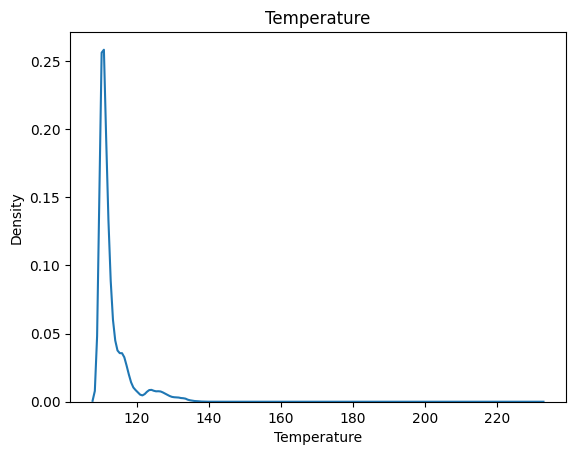

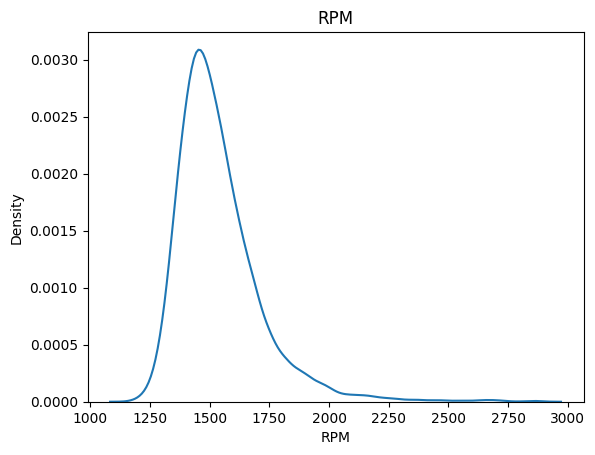

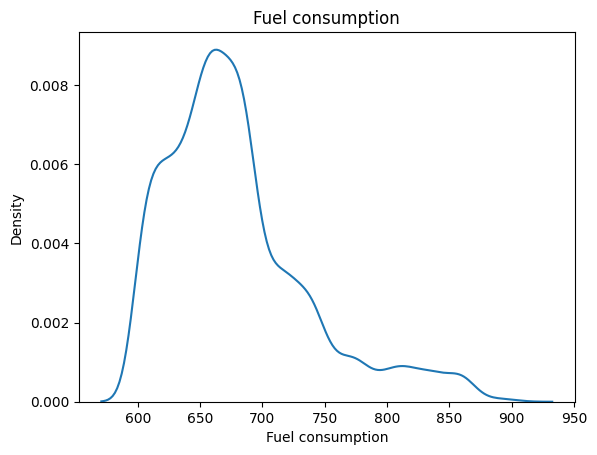

In [544]:
# check for data inbalance of all categorical features
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    if df[column].dtype == 'float64':
        plt.figure() # create new figure for each plot
        sns.kdeplot(df[column])
        plt.title(column) # set title for each plot as the column name
        plt.show()

In [545]:
# bimodality was observed in temperature, check its correlation with other features.
def check_correlation(df, column_name, other_column_list):
    correlation_dict = {}
    for other_column in other_column_list:
        correlation = df[column_name].corr(df[other_column])
        correlation_dict[other_column] = correlation
    return correlation_dict

# obtain a list of columns
columns = df.columns.tolist()

columns.remove('Temperature')
# columns.remove('Color')
columns.remove('Failure A')
columns.remove('Failure B')
columns.remove('Failure C')
columns.remove('Failure D')
columns.remove('Failure E')

check_correlation(df, 'Temperature', columns)

{'Model': -0.004751783319584112,
 'RPM': 0.022292987220424894,
 'Usage': 0.013470031078525827,
 'Fuel consumption': 0.005525497064572376,
 'Membership': 0.0007014246534963875,
 'age': 0.005353621767332336,
 'country_China': -0.009052609758141872,
 'country_U.S': 0.0032211945716260062}

In [546]:
# Alas! The cause is found! It was a stupid mistake to use different units F/C in different countries 
# the data clean step above was revised to correct this error

In [547]:
# bimodality was also found in RPM, it was due to signed readings, added a 
# data clean step to correct this error

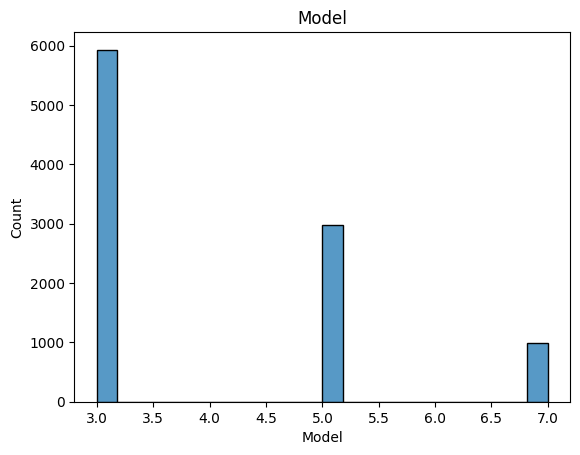

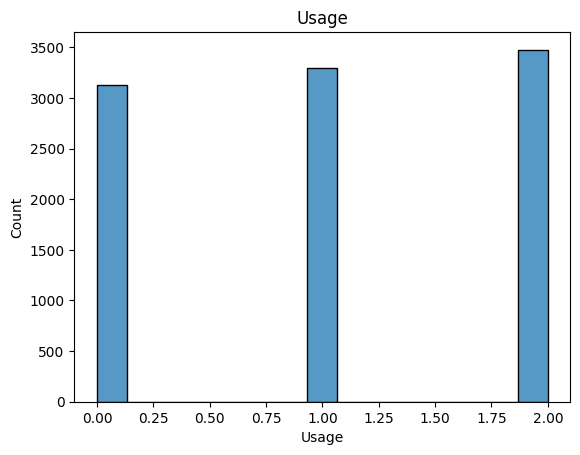

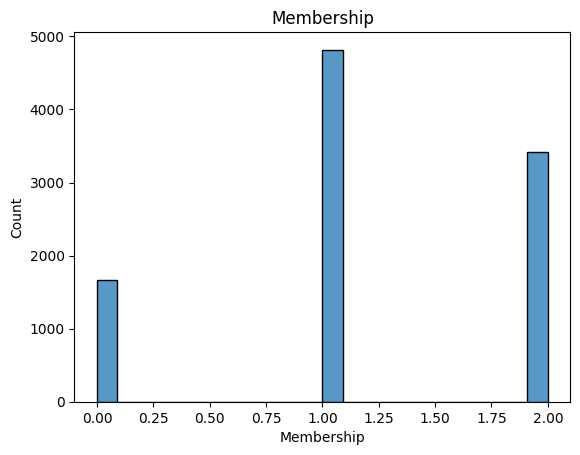

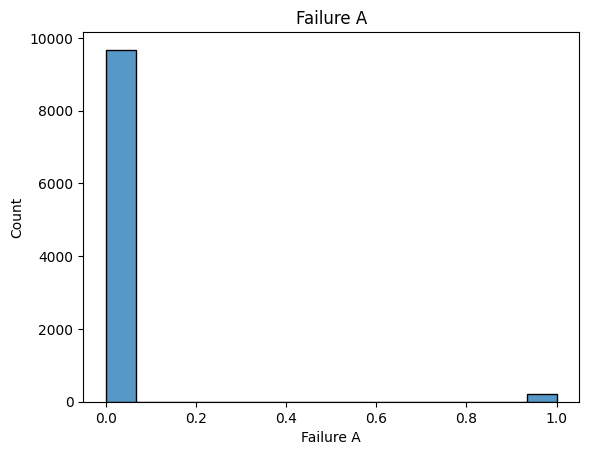

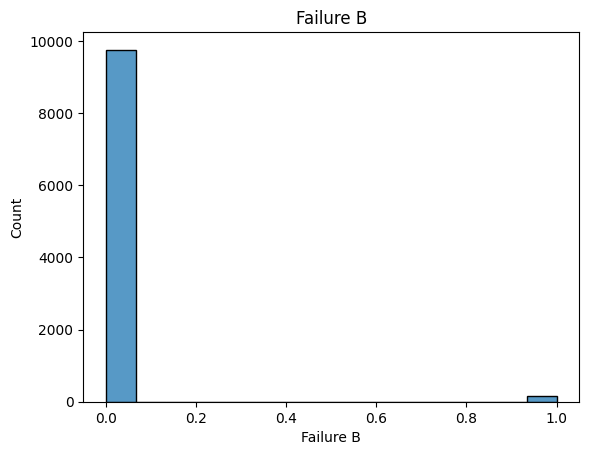

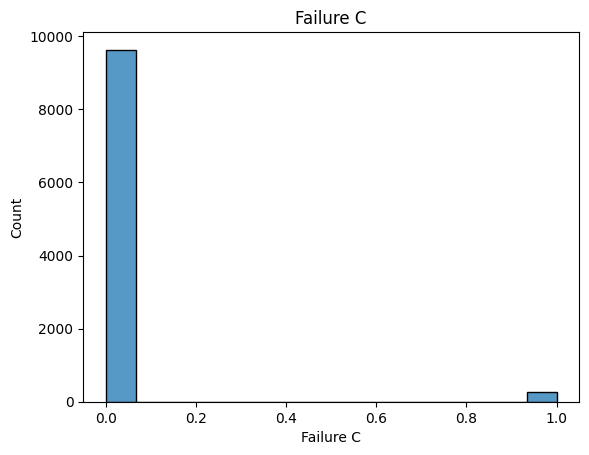

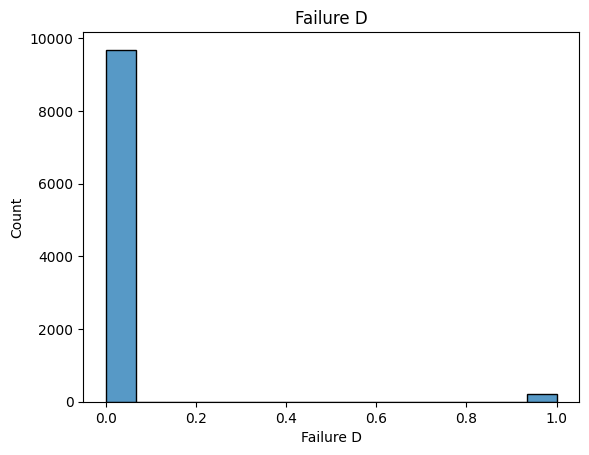

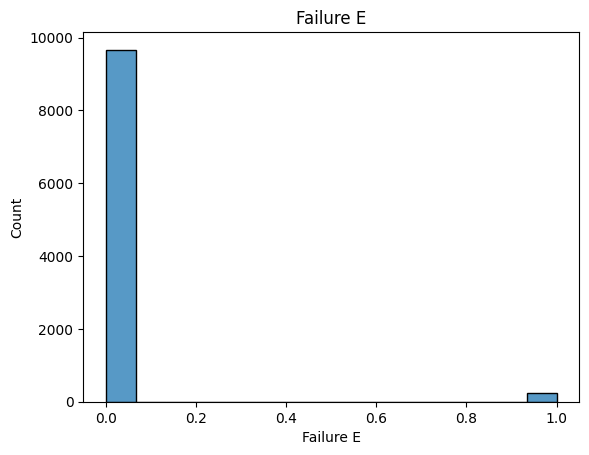

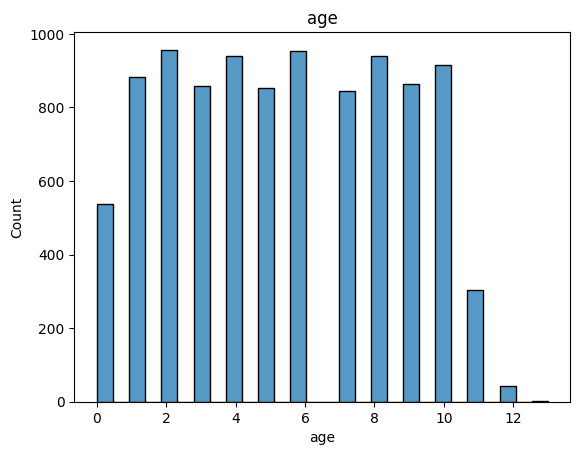

In [548]:
# check for data inbalance of all numeric features
for column in df.columns:
    if (df[column].dtype == 'int64') or (df[column].dtype == 'int32'):
        plt.figure() # create new figure for each plot
        sns.histplot(df[column])
        plt.title(column) # set title for each plot as the column name
        plt.show()


In [549]:
# Rearrange the dataframe, define the features and labels
# obtain a list of columns
columns = df.columns.tolist()

# define the labels (failure A-E) and features columns
labels = columns[columns.index('Failure A'):columns.index('Failure E')+1]
features = [col for col in columns if col not in labels]

# shift the labels columns to the last
df = df[columns[:columns.index('Failure A')] + columns[columns.index('Failure E')+1:] + labels]


In [550]:
# export the dataframe as csv for further analysis
df.to_csv('clean_data.csv', index=True)

## - split the dataset

In [551]:
# split the dataset 2 ways into train and test
# validation will be automatcially implemented during architecture search

# shuffle the data with random seed 10
df = df.sample(frac=1, random_state = 10)

# define split ratio
split_ratio = 0.8
total_rows = df.shape[0]
train_size = int(total_rows*split_ratio)

# Split data into test and train
train_df = df[0:train_size]
test_df = df[train_size:]

# Build the model

This is an existing multi-lable predictor module borrowed from autogluon, (eventually not used given inflexibility).

- The Import statements were kept for TabularPredictor in the later trainings.

- The MultilablePredictor() class sourcecode were still kept in case replication of earlier training results was desired

In [552]:
from autogluon.tabular import TabularDataset, TabularPredictor
from autogluon.common.utils.utils import setup_outputdir
from autogluon.core.utils.loaders import load_pkl
from autogluon.core.utils.savers import save_pkl
import os.path

# class MultilabelPredictor():
#     """ Tabular Predictor for predicting multiple columns in table.
#         Creates multiple TabularPredictor objects which you can also use individually.
#         You can access the TabularPredictor for a particular label via: `multilabel_predictor.get_predictor(label_i)`

#         Parameters
#         ----------
#         labels : List[str]
#             The ith element of this list is the column (i.e. `label`) predicted by the ith TabularPredictor stored in this object.
#         path : str, default = None
#             Path to directory where models and intermediate outputs should be saved.
#             If unspecified, a time-stamped folder called "AutogluonModels/ag-[TIMESTAMP]" will be created in the working directory to store all models.
#             Note: To call `fit()` twice and save all results of each fit, you must specify different `path` locations or don't specify `path` at all.
#             Otherwise files from first `fit()` will be overwritten by second `fit()`.
#             Caution: when predicting many labels, this directory may grow large as it needs to store many TabularPredictors.
#         problem_types : List[str], default = None
#             The ith element is the `problem_type` for the ith TabularPredictor stored in this object.
#         eval_metrics : List[str], default = None
#             The ith element is the `eval_metric` for the ith TabularPredictor stored in this object.
#         consider_labels_correlation : bool, default = True
#             Whether the predictions of multiple labels should account for label correlations or predict each label independently of the others.
#             If True, the ordering of `labels` may affect resulting accuracy as each label is predicted conditional on the previous labels appearing earlier in this list (i.e. in an auto-regressive fashion).
#             Set to False if during inference you may want to individually use just the ith TabularPredictor without predicting all the other labels.
#         kwargs :
#             Arguments passed into the initialization of each TabularPredictor.

#     """

#     multi_predictor_file = 'multilabel_predictor.pkl'

#     def __init__(self, labels, path=None, problem_types=None, eval_metrics=None, consider_labels_correlation=True, **kwargs):
#         if len(labels) < 2:
#             raise ValueError("MultilabelPredictor is only intended for predicting MULTIPLE labels (columns), use TabularPredictor for predicting one label (column).")
#         if (problem_types is not None) and (len(problem_types) != len(labels)):
#             raise ValueError("If provided, `problem_types` must have same length as `labels`")
#         if (eval_metrics is not None) and (len(eval_metrics) != len(labels)):
#             raise ValueError("If provided, `eval_metrics` must have same length as `labels`")
#         self.path = setup_outputdir(path, warn_if_exist=False)
#         self.labels = labels
#         self.consider_labels_correlation = consider_labels_correlation
#         self.predictors = {}  # key = label, value = TabularPredictor or str path to the TabularPredictor for this label
#         if eval_metrics is None:
#             self.eval_metrics = {}
#         else:
#             self.eval_metrics = {labels[i] : eval_metrics[i] for i in range(len(labels))}
#         problem_type = None
#         eval_metric = None
#         for i in range(len(labels)):
#             label = labels[i]
#             path_i = self.path + "Predictor_" + label
#             if problem_types is not None:
#                 problem_type = problem_types[i]
#             if eval_metrics is not None:
#                 eval_metric = eval_metrics[i]
#             self.predictors[label] = TabularPredictor(label=label, problem_type=problem_type, eval_metric=eval_metric, path=path_i, **kwargs)

#     def fit(self, train_data, tuning_data=None, **kwargs):
#         """ Fits a separate TabularPredictor to predict each of the labels.

#             Parameters
#             ----------
#             train_data, tuning_data : str or autogluon.tabular.TabularDataset or pd.DataFrame
#                 See documentation for `TabularPredictor.fit()`.
#             kwargs :
#                 Arguments passed into the `fit()` call for each TabularPredictor.
#         """
#         if isinstance(train_data, str):
#             train_data = TabularDataset(train_data)
#         if tuning_data is not None and isinstance(tuning_data, str):
#             tuning_data = TabularDataset(tuning_data)
#         train_data_og = train_data.copy()
#         if tuning_data is not None:
#             tuning_data_og = tuning_data.copy()
#         else:
#             tuning_data_og = None
#         save_metrics = len(self.eval_metrics) == 0
#         for i in range(len(self.labels)):
#             label = self.labels[i]
#             predictor = self.get_predictor(label)
#             if not self.consider_labels_correlation:
#                 labels_to_drop = [l for l in self.labels if l != label]
#             else:
#                 labels_to_drop = [self.labels[j] for j in range(i+1, len(self.labels))]
#             train_data = train_data_og.drop(labels_to_drop, axis=1)
#             if tuning_data is not None:
#                 tuning_data = tuning_data_og.drop(labels_to_drop, axis=1)
#             print(f"Fitting TabularPredictor for label: {label} ...")
#             predictor.fit(train_data=train_data, tuning_data=tuning_data, **kwargs)
#             self.predictors[label] = predictor.path
#             if save_metrics:
#                 self.eval_metrics[label] = predictor.eval_metric
#         self.save()

#     def predict(self, data, **kwargs):
#         """ Returns DataFrame with label columns containing predictions for each label.

#             Parameters
#             ----------
#             data : str or autogluon.tabular.TabularDataset or pd.DataFrame
#                 Data to make predictions for. If label columns are present in this data, they will be ignored. See documentation for `TabularPredictor.predict()`.
#             kwargs :
#                 Arguments passed into the predict() call for each TabularPredictor.
#         """
#         return self._predict(data, as_proba=False, **kwargs)

#     def predict_proba(self, data, **kwargs):
#         """ Returns dict where each key is a label and the corresponding value is the `predict_proba()` output for just that label.

#             Parameters
#             ----------
#             data : str or autogluon.tabular.TabularDataset or pd.DataFrame
#                 Data to make predictions for. See documentation for `TabularPredictor.predict()` and `TabularPredictor.predict_proba()`.
#             kwargs :
#                 Arguments passed into the `predict_proba()` call for each TabularPredictor (also passed into a `predict()` call).
#         """
#         return self._predict(data, as_proba=True, **kwargs)

#     def evaluate(self, data, **kwargs):
#         """ Returns dict where each key is a label and the corresponding value is the `evaluate()` output for just that label.

#             Parameters
#             ----------
#             data : str or autogluon.tabular.TabularDataset or pd.DataFrame
#                 Data to evalate predictions of all labels for, must contain all labels as columns. See documentation for `TabularPredictor.evaluate()`.
#             kwargs :
#                 Arguments passed into the `evaluate()` call for each TabularPredictor (also passed into the `predict()` call).
#         """
#         data = self._get_data(data)
#         eval_dict = {}
#         for label in self.labels:
#             print(f"Evaluating TabularPredictor for label: {label} ...")
#             predictor = self.get_predictor(label)
#             eval_dict[label] = predictor.evaluate(data, **kwargs)
#             if self.consider_labels_correlation:
#                 data[label] = predictor.predict(data, **kwargs)
#         return eval_dict

#     def save(self):
#         """ Save MultilabelPredictor to disk. """
#         for label in self.labels:
#             if not isinstance(self.predictors[label], str):
#                 self.predictors[label] = self.predictors[label].path
#         save_pkl.save(path=self.path+self.multi_predictor_file, object=self)
#         print(f"MultilabelPredictor saved to disk. Load with: MultilabelPredictor.load('{self.path}')")

#     @classmethod
#     def load(cls, path):
#         """ Load MultilabelPredictor from disk `path` previously specified when creating this MultilabelPredictor. """
#         path = os.path.expanduser(path)
#         if path[-1] != os.path.sep:
#             path = path + os.path.sep
#         return load_pkl.load(path=path+cls.multi_predictor_file)

#     def get_predictor(self, label):
#         """ Returns TabularPredictor which is used to predict this label. """
#         predictor = self.predictors[label]
#         if isinstance(predictor, str):
#             return TabularPredictor.load(path=predictor)
#         return predictor

#     def _get_data(self, data):
#         if isinstance(data, str):
#             return TabularDataset(data)
#         return data.copy()

#     def _predict(self, data, as_proba=False, **kwargs):
#         data = self._get_data(data)
#         if as_proba:
#             predproba_dict = {}
#         for label in self.labels:
#             print(f"Predicting with TabularPredictor for label: {label} ...")
#             predictor = self.get_predictor(label)
#             if as_proba:
#                 predproba_dict[label] = predictor.predict_proba(data, as_multiclass=True, **kwargs)
#             data[label] = predictor.predict(data, **kwargs)
#         if not as_proba:
#             return data[self.labels]
#         else:
#             return predproba_dict

# Train

## - First Training

1. Using MultilablePredictor, which wraps over TabularPredictor to simplify the process and configurations of Multi-label prediction tasks. 
2. Starting with naive assumption that labels correlation is important, which was proven otherwise during experimenting. 

commented out to avoid impact on later trainings.

In [554]:
# # define hyperparameters, evaluation metrics
# eval_metrics = ['roc_auc','roc_auc','roc_auc','roc_auc','roc_auc']
# save_path = 'E:/Models'
# presets ='best_quality'

# # instantiate multi-label predictor
# multilabel_predictor = MultilabelPredictor(labels = labels,
#                                            consider_labels_correlation = False,
#                                            path = save_path,
#                                            eval_metrics = eval_metrics,
#                                           )

In [555]:

# # start training
# multilabel_predictor.fit(train_df, 
#                          time_limit = 30*60,
#                          presets = presets,
#                          num_gpus=1
#                         )

# # in-depth view of individual model performance
# multilabel_predictor.evaluate(test_df)

# # with extracting each predictor from the multi-label model, now we can 
# # implement all methods available for each individual predictor

# for label in labels:

#     # take out the predictor class of each individual label
#     predictor_class = multilabel_predictor.get_predictor(label)
    
#     # show their leaderboard
#     print(predictor_class.leaderboard(silent=True))

# #     print(predictor_class.fit_summary(showplot=True))



## - Second Training

1. Remove the lamer models (unsuccessful due to unknown reasons)
2. Try out a different metrics: f1-score as better indication of imbalanced labels, especially on low-recalls
3. Specify problem type to minimize guessing time

In [556]:

# # define hyperparameters, evaluation metrics
# eval_metrics = ['f1','f1','f1','f1','f1']
# save_path = 'E:/Models'
# presets ='best_quality'

# problem_types = ['binary' for _ in range(len(labels))]

# # instantiate multi-label predictor
# multilabel_predictor = MultilabelPredictor(labels = labels,
#                                            consider_labels_correlation = False,
#                                            path = save_path,
#                                            eval_metrics = eval_metrics,
#                                            problem_types = problem_types)
                                          

# # now we are smarter about models, let's exclude undesired models:
# # slow performer: CatBoost_BAG_L1, LightGBMLarge_BAG_L1
# # poor performer: ExtraTreesEntr_BAG_L1, ExtraTreesGini_BAG_L1, KNeighborsDist_BAG_L1, KNeighborsUnif_BAG_L1
# excluded_model_types = [('KNN',
#                          'CAT',
#                          'XT',                                                                  
#                         ) for _ in range(len(labels))]

# print(excluded_model_types)
# # start training
# multilabel_predictor.fit(train_df, 
#                          time_limit = 30*60,                    
#                          presets = presets,
#                          excluded_model_types = excluded_model_types,                     
#                          num_gpus=1)
                        

# # in-depth view of individual model performance
# multilabel_predictor.evaluate(test_df)

# # compare model performance
# for label in labels:
#     predictor_class = multilabel_predictor.get_predictor(label)
#     print(predictor_class.leaderboard(silent=True))


## - Third Training
1. Switched from Multilable Predictor to single TabularPredictor class due to limitations in functionalities.
2. Removed the less effective models successfully (KNN, CAT, XT)
3. Manually balance the data by resampling
4. Using single label predictors instead of multi-label predictor given the issues with predictibility
5. Change metric from 'f1' to 'recall' directly
6. Disabled the 'high-quality' presets as it's found not helpful

In [557]:
# # there is large class imbalanced in the labels, to resample the samples.
# import pandas as pd
# from sklearn.utils import resample

# print(df.shape[0])

# X_df = pd.DataFrame()

# # up-sample rows containing value '1' in each label column by 3 times
# for label in labels:
#     df_minority = df[df[label]==1]
#     df_minority_upsampled = resample(df_minority, 
#                                      replace=True,     # sample with replacement
#                                      n_samples=len(df_minority)*3,    # to match majority class
#                                      random_state=123) # reproducible results
#     print('iter: ', df_minority_upsampled.shape[0])
#     X_df = pd.concat([X_df, df_minority_upsampled])

# print(X_df.shape[0])

# # down-sample rows with all '0' values in the label columns by 3 times
# df_majority = df[(df[labels]==0).all(axis=1)]

# print(df_majority.shape[0])

# df_majority_downsampled = resample(df_majority, 
#                                    replace=False,    # sample without replacement
#                                    n_samples=len(df_majority)//3,    
#                                    random_state=123) # reproducible results

# print(df_majority_downsampled.shape[0])

# # concatenate the downsampled rows back to the original DataFrame
# df = pd.concat([X_df, df_majority_downsampled])

# print(df.shape[0])

# # by doing so, there are ~900 '1's with each labels, there are ~16114 in total

In [558]:
# # re-split the dataset 2 ways into train and test
# df = df.sample(frac=1, random_state = 10)

# split_ratio = 0.8
# total_rows = df.shape[0]
# train_size = int(total_rows*split_ratio)

# train_df = df[0:train_size]
# test_df = df[train_size:]

In [559]:
# # export the dataframe as csv for further analysis
# df.to_csv('clean_data.csv', index=True)

In [560]:
# # define hyperparameters, evaluation metrics
# eval_metric = 'recall'
# save_path = 'E:/Models'
# presets ='best_quality'
# auto_stack = True
# problem_type = 'binary'

# X_df = train_df[features]
    
# for label in labels:

#     if label == 'Failure A': # test for the first label
        
#         y_i_df = train_df[label]

#         train_i_df = pd.concat([X_df, y_i_df], axis=1)

#         # instantiate multi-label predictor
#         predictor = TabularPredictor(label = label,                                        
#                                         path = save_path,
#                                         eval_metric = eval_metric,
#                                         problem_type = problem_type)


#         # now we are smarter about models, let's exclude undesired models:
#         # slow performer: CatBoost_BAG_L1, LightGBMLarge_BAG_L1
#         # poor performer: ExtraTreesEntr_BAG_L1, ExtraTreesGini_BAG_L1, KNeighborsDist_BAG_L1, KNeighborsUnif_BAG_L1
# #         excluded_model_types = ['CatBoost_BAG_L1',
# #                                  'LightGBMLarge_BAG_L1',
# #                                  'KNeighborsDist_BAG_L1',
# #                                  'KNeighborsUnif_BAG_L1',
# #                                  'ExtraTreesGini_BAG_L1',
# #                                  'ExtraTreesEntr_BAG_L1'                                                                     
# #                                 ]
        
#         excluded_model_types = ['CAT',
#                                 'KNN',
#                                 'XT',
#                                 ]

#         # start training
#         predictor.fit(train_i_df, 
#                       time_limit = 30*60,                    
# #                       presets = presets,
#                       excluded_model_types = excluded_model_types,
#                       auto_stack = True,
#                       num_gpus=1)


#         # in-depth view of individual model performance
#         predictor.evaluate(test_df)
        
#         # compare model performance
#         print(predictor.leaderboard(extra_info=True,silent=True))


## - Fourth Training
1. Improved resampling strategy using iterative grouping, i.e. instead of downsample the majority group, take randomly 1/5 of the majority group and combine it with each label during the training of each label, upsample minority group from x3 to x5, it improves the class ratio from 1:5 to 1:1, and reduced information loss from down-sampling.
2. Reviewed the feature importance

In [561]:
# # re-split the dataset 2 ways into train and test
# df = df.sample(frac=1, random_state = 10)

# split_ratio = 0.8
# total_rows = df.shape[0]
# train_size = int(total_rows*split_ratio)

# train_df = df[0:train_size]
# test_df = df[train_size:]

In [562]:
# import pandas as pd
# from sklearn.utils import resample

# # define hyperparameters, evaluation metrics
# eval_metric = 'recall'
# save_path = 'E:/Models'
# presets ='best_quality'
# auto_stack = True
# problem_type = 'binary'


# # define the majority from the train set, by selection rows with all labels = 0
# df_majority = train_df[(df[labels]==0).all(axis=1)]
# df_majority_size = df_majority.shape[0]
# df_majority_segment_size = df_majority_size // 5

# print('total majority size = ', df_majority.shape[0])


# # the resampling is done in each iteration
# for i, label in enumerate(labels):
    
#     if label == 'Failure A': # test for the first label
        
#         df_minority = df[df[label]==1]
#         print('old minority size = ', df_minority.shape[0])
        
#         df_minority_upsampled = resample(df_minority, 
#                                          replace=True,     # sample with replacement
#                                          n_samples=len(df_minority)*5,    # to match majority class
#                                          random_state=123) # reproducible results

#         df_majority_downsampled = df_majority.iloc[i*df_majority_segment_size:(i+1)*df_majority_segment_size]

#         print('new minority size = ', df_minority_upsampled.shape[0])
#         print('new majority size = ', df_majority_downsampled.shape[0])
        
#         # concat the resampled dataset as new train set
#         train_df = pd.concat([df_minority_upsampled, df_majority_downsampled])
        
#         # to remove all the other label columns
#         y_i_df = train_df[label]
#         X_df = train_df[features]

#         train_i_df = pd.concat([X_df, y_i_df], axis=1)

#         # instantiate multi-label predictor
#         predictor = TabularPredictor(label = label,                                        
#                                         path = save_path,
#                                         eval_metric = eval_metric,
#                                         problem_type = problem_type)
#         # exclude less effective models
#         excluded_model_types = ['CAT',
#                                 'KNN',
#                                 'XT',
#                                 ]

#         # start training
#         predictor.fit(train_i_df, 
#                       time_limit = 30*60,                    
# #                       presets = presets,
#                       excluded_model_types = excluded_model_types,
#                       auto_stack = True,
#                       num_gpus=1)


#         # in-depth view of individual model performance
#         predictor.evaluate(test_df)
        
#         # compare model performance
#         print(predictor.leaderboard(extra_info=True,silent=True))

In [563]:
# # in-depth view of individual model performance
# predictor.evaluate(test_df)

In [564]:
# # review the importance of each feature computed using permutation-shuffling
# predictor.feature_importance(test_df)

# # two insights: 1. cars made in Germany breaks down truly randomly. 2. Color really doesn't matter. To drop both columns (in front)


## - Fifth Training
1. removed the irrelevant columns: 'country_Germany' and 'Color'
2. introduce normalization for the numerical variables.
3. reintroduce back KNN and ExtraTree, hoping they perform better with normalized data.
4. check model leaderboard by training and evaluating all 5 labels

In [565]:
# data normalization

import numpy as np
from sklearn.preprocessing import StandardScaler


columns_Log = ['Temperature']
columns_Zscore = ['RPM', 'Fuel consumption']

# apply log transformation to Temperature
df[columns_Log] = np.log(df[columns_Log])

# apply Z-score to RPM and Fuel consumption
scaler = StandardScaler()
df[columns_Zscore] = scaler.fit_transform(df[columns_Zscore])


In [566]:
# split the dataset 2 ways into train and test
df = df.sample(frac=1, random_state = 10)

split_ratio = 0.8
total_rows = df.shape[0]
train_size = int(total_rows*split_ratio)

train_df = df[0:train_size]
test_df = df[train_size:]

In [567]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt

# define hyperparameters, evaluation metrics
eval_metric = 'recall'
save_path = 'E:/Models'
presets ='best_quality'
auto_stack = True
problem_type = 'binary'


# define the majority from the train set, by selection rows with all labels = 0
df_majority = train_df[(df[labels]==0).all(axis=1)]
df_majority_size = df_majority.shape[0]
df_majority_segment_size = df_majority_size // 5

print('total majority size = ', df_majority.shape[0])

# create a dictionary to store the metrics of each label
perfs = {}

# create a dictionary to store the names of the group of models trained in each label
model_gps = {}

# create a dictionary to store all leaderboards trained withs each label
leaderboards = {}

# create a dictionary to store the name of the best model trained with each label
best_models = {}


# the resampling is done in each iteration
for i, label in enumerate(labels):
    
#     if label == 'Failure A': # test for the first label
        
    df_minority = df[df[label]==1]
    print('old minority size = ', df_minority.shape[0])

    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=len(df_minority)*5,    # to match majority class
                                     random_state=123) # reproducible results

    df_majority_downsampled = df_majority.iloc[i*df_majority_segment_size:(i+1)*df_majority_segment_size]

    print('new minority size = ', df_minority_upsampled.shape[0])
    print('new majority size = ', df_majority_downsampled.shape[0])

    # concat the resampled dataset as new train set
    train_df = pd.concat([df_minority_upsampled, df_majority_downsampled])

    # to remove all the other label columns
    y_i_df = train_df[label]
    X_df = train_df[features]

    train_i_df = pd.concat([X_df, y_i_df], axis=1)

    # instantiate multi-label predictor
    predictor = TabularPredictor(label = label,                                        
                                    path = save_path,
                                    eval_metric = eval_metric,
                                    problem_type = problem_type)
    # exclude less effective models
    excluded_model_types = ['CAT',
#                                 'KNN',
#                                 'XT',
                            ]

    # start training
    predictor.fit(train_i_df, 
                  time_limit = 30*60,                    
#                       presets = presets,
                  excluded_model_types = excluded_model_types,
                  auto_stack = True,
                  num_gpus=1)

    # get the best model name and add into dictionary
    best_model = predictor.get_model_best()
    best_models[label] = best_model

    # get the list of models
    models = predictor.get_model_names()

    # collects the models into model groups
    model_gps[label] = models

    perf = {}
    # evaluate and collect the individual model performance as a dictionary, with values being a dictionery of {metric:value}
    for model in models:
        perf[model] = predictor.evaluate(test_df, model=model)

    # collects performance of all labels, with values being a dictionry of {label:models}
    perfs[label] = perf

    # show leader board the current label
    leaderboards[label] = predictor.leaderboard(silent=True)

C:\Users\HYL\AppData\Local\Temp\ipykernel_15268\3588393785.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_majority = train_df[(df[labels]==0).all(axis=1)]
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1800s
AutoGluon will save models to "E:/Models\"
AutoGluon Version:  0.6.1
Python Version:     3.9.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19044
Train Data Rows:    2532
Train Data Columns: 9
Label Column: Failure A
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    58840.71 MB
	Train Data (Original)  Memory Usage: 0.13 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify sp

total majority size =  7039
old minority size =  225
new minority size =  1125
new majority size =  1407


	0.9956	 = Validation score   (recall)
	0.01s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 1799.8s of the 1799.8s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	0.9858	 = Validation score   (recall)
	31.4s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1765.73s of the 1765.73s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	0.9893	 = Validation score   (recall)
	17.23s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 1743.62s of the 1743.62s of remaining time.
	0.9956	 = Validation score   (recall)
	0.69s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: RandomForestEntr_BAG_L1 ... Training model for up to 1742.71s of the 1742.71s of remaining time.
	0.9956

		'NoneType' object has no attribute '_user_params_aux'
Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1422, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1367, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 688, in fit
    kwargs = self._preprocess_fit_args(**kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 428, in _preprocess_fit_args
    kwargs = self._preprocess_fit_resources(**kwargs)
  File "C:\Users\HYL\anacon

Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1800s
AutoGluon will save models to "E:/Models\"
AutoGluon Version:  0.6.1
Python Version:     3.9.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19044
Train Data Rows:    2142
Train Data Columns: 9
Label Column: Failure B
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    58818.65 MB
	Train Data (Original)  Memory Usage: 0.11 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		

old minority size =  147
new minority size =  735
new majority size =  1407


	0.01s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 1799.83s of the 1799.83s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	0.9973	 = Validation score   (recall)
	33.83s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1763.4s of the 1763.39s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	0.9973	 = Validation score   (recall)
	16.31s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 1742.21s of the 1742.2s of remaining time.
	0.9973	 = Validation score   (recall)
	0.66s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: RandomForestEntr_BAG_L1 ... Training model for up to 1741.31s of the 1741.31s of remaining time.
	0.9973	 = Validation score   (recall)
	0.66s

		'NoneType' object has no attribute '_user_params_aux'
Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1422, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1367, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 688, in fit
    kwargs = self._preprocess_fit_args(**kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 428, in _preprocess_fit_args
    kwargs = self._preprocess_fit_resources(**kwargs)
  File "C:\Users\HYL\anacon

Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1800s
AutoGluon will save models to "E:/Models\"
AutoGluon Version:  0.6.1
Python Version:     3.9.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19044
Train Data Rows:    2757
Train Data Columns: 9
Label Column: Failure C
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    58807.81 MB
	Train Data (Original)  Memory Usage: 0.14 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		

old minority size =  270
new minority size =  1350
new majority size =  1407


	0.9956	 = Validation score   (recall)
	0.01s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 1799.77s of the 1799.77s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	0.9904	 = Validation score   (recall)
	33.05s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1764.15s of the 1764.14s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	0.9963	 = Validation score   (recall)
	18.4s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 1741.21s of the 1741.21s of remaining time.
	0.9978	 = Validation score   (recall)
	0.73s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: RandomForestEntr_BAG_L1 ... Training model for up to 1740.28s of the 1740.28s of remaining time.
	0.99

		'NoneType' object has no attribute '_user_params_aux'
Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1422, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1367, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 688, in fit
    kwargs = self._preprocess_fit_args(**kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 428, in _preprocess_fit_args
    kwargs = self._preprocess_fit_resources(**kwargs)
  File "C:\Users\HYL\anacon

Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1800s
AutoGluon will save models to "E:/Models\"
AutoGluon Version:  0.6.1
Python Version:     3.9.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19044
Train Data Rows:    2487
Train Data Columns: 9
Label Column: Failure D
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    58805.29 MB
	Train Data (Original)  Memory Usage: 0.12 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		

old minority size =  216
new minority size =  1080
new majority size =  1407


Fitting model: KNeighborsDist_BAG_L1 ... Training model for up to 1799.85s of the 1799.84s of remaining time.
	0.9954	 = Validation score   (recall)
	0.01s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 1799.78s of the 1799.77s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	0.9806	 = Validation score   (recall)
	33.87s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1763.34s of the 1763.34s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	0.9935	 = Validation score   (recall)
	18.73s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 1739.77s of the 1739.77s of remaining time.
	0.9944	 = Validation score   (recall)
	0.84s	 = Training   runtime
	0.19s	 = Validation runtime
Fittin

Fitting model: XGBoost_BAG_L1 ... Training model for up to 1585.85s of the 1585.85s of remaining time.
		'NoneType' object has no attribute '_user_params_aux'
Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1422, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1367, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 688, in fit
    kwargs = self._preprocess_fit_args(**kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 428, in

Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 1800s
AutoGluon will save models to "E:/Models\"
AutoGluon Version:  0.6.1
Python Version:     3.9.15
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19044
Train Data Rows:    2577
Train Data Columns: 9
Label Column: Failure E
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    58801.93 MB
	Train Data (Original)  Memory Usage: 0.13 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		

old minority size =  234
new minority size =  1170
new majority size =  1407


	0.9795	 = Validation score   (recall)
	32.25s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1765.04s of the 1765.04s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	0.9932	 = Validation score   (recall)
	18.18s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 1741.95s of the 1741.95s of remaining time.
	0.9966	 = Validation score   (recall)
	0.69s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: RandomForestEntr_BAG_L1 ... Training model for up to 1741.07s of the 1741.07s of remaining time.
	0.9966	 = Validation score   (recall)
	0.75s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: ExtraTreesGini_BAG_L1 ... Training model for up to 1740.11s of the 1740.11s of remaining time.
	0.9957	 = Validation score   (recall)
	0.94s	 = Training   runtime
	0.18s	 = Validatio

Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 1591.45s of the 1591.45s of remaining time.
		'NoneType' object has no attribute '_user_params_aux'
Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1422, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1367, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 688, in fit
    kwargs = self._preprocess_fit_args(**kwargs)
  File "C:\Users\HYL\anaconda3\envs\AISG\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 4

# Test

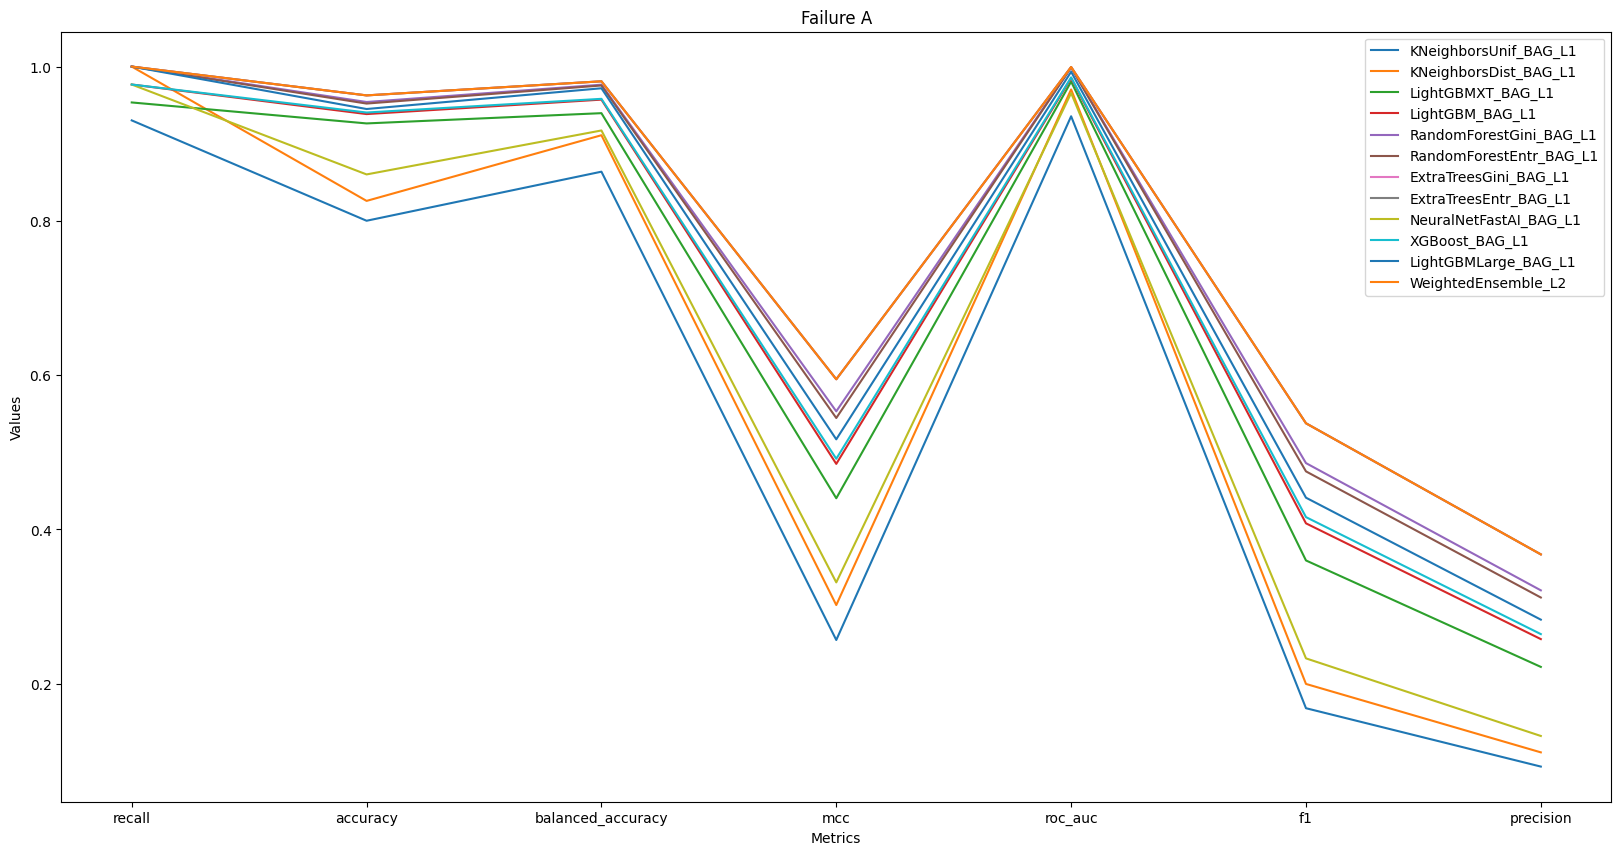

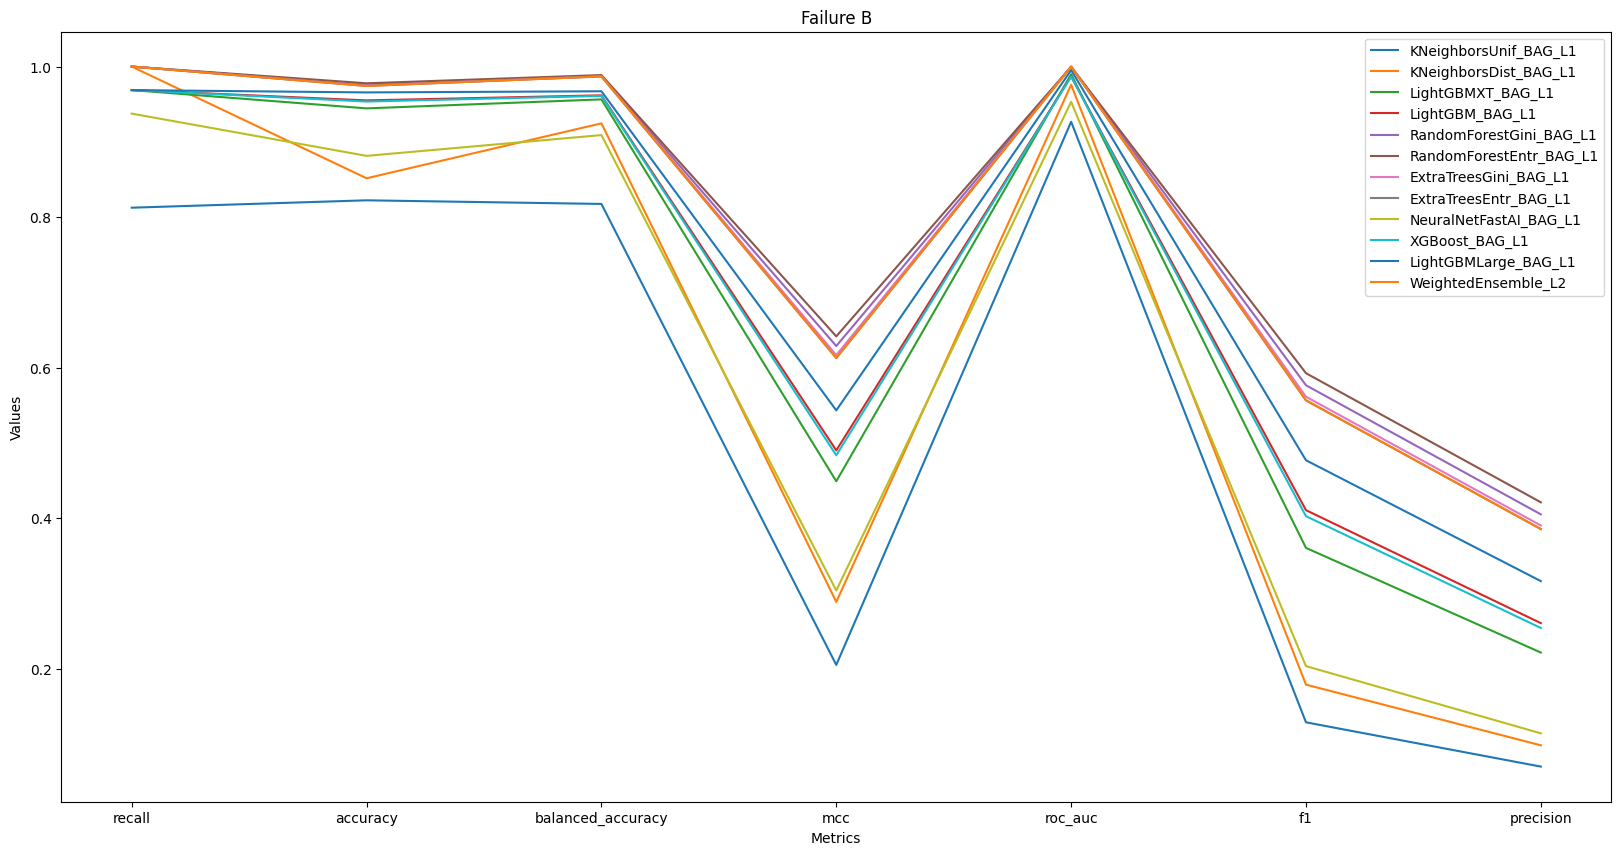

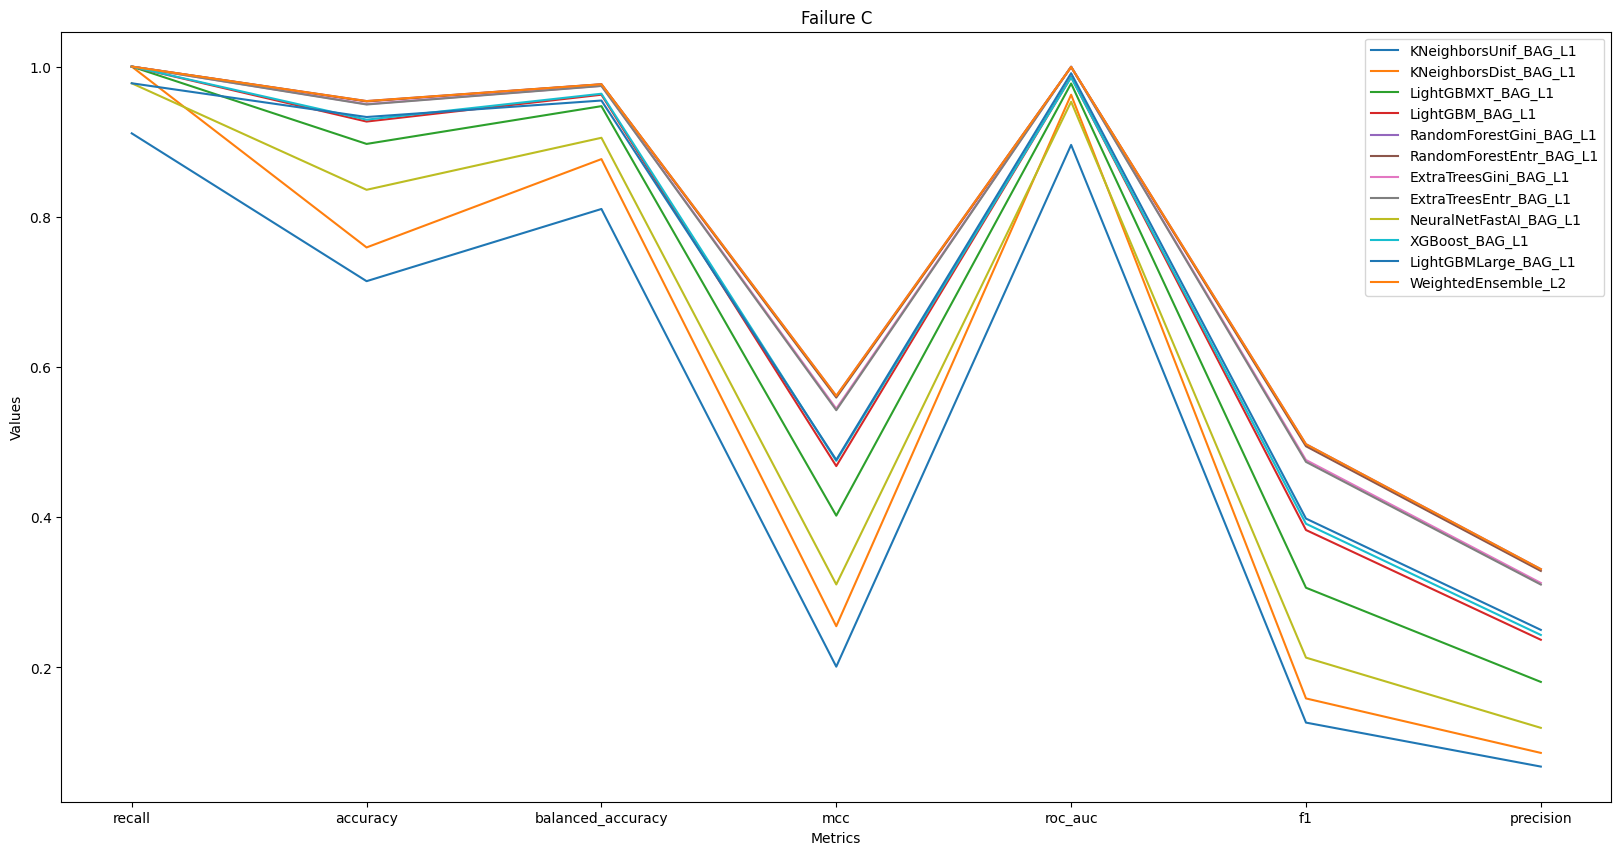

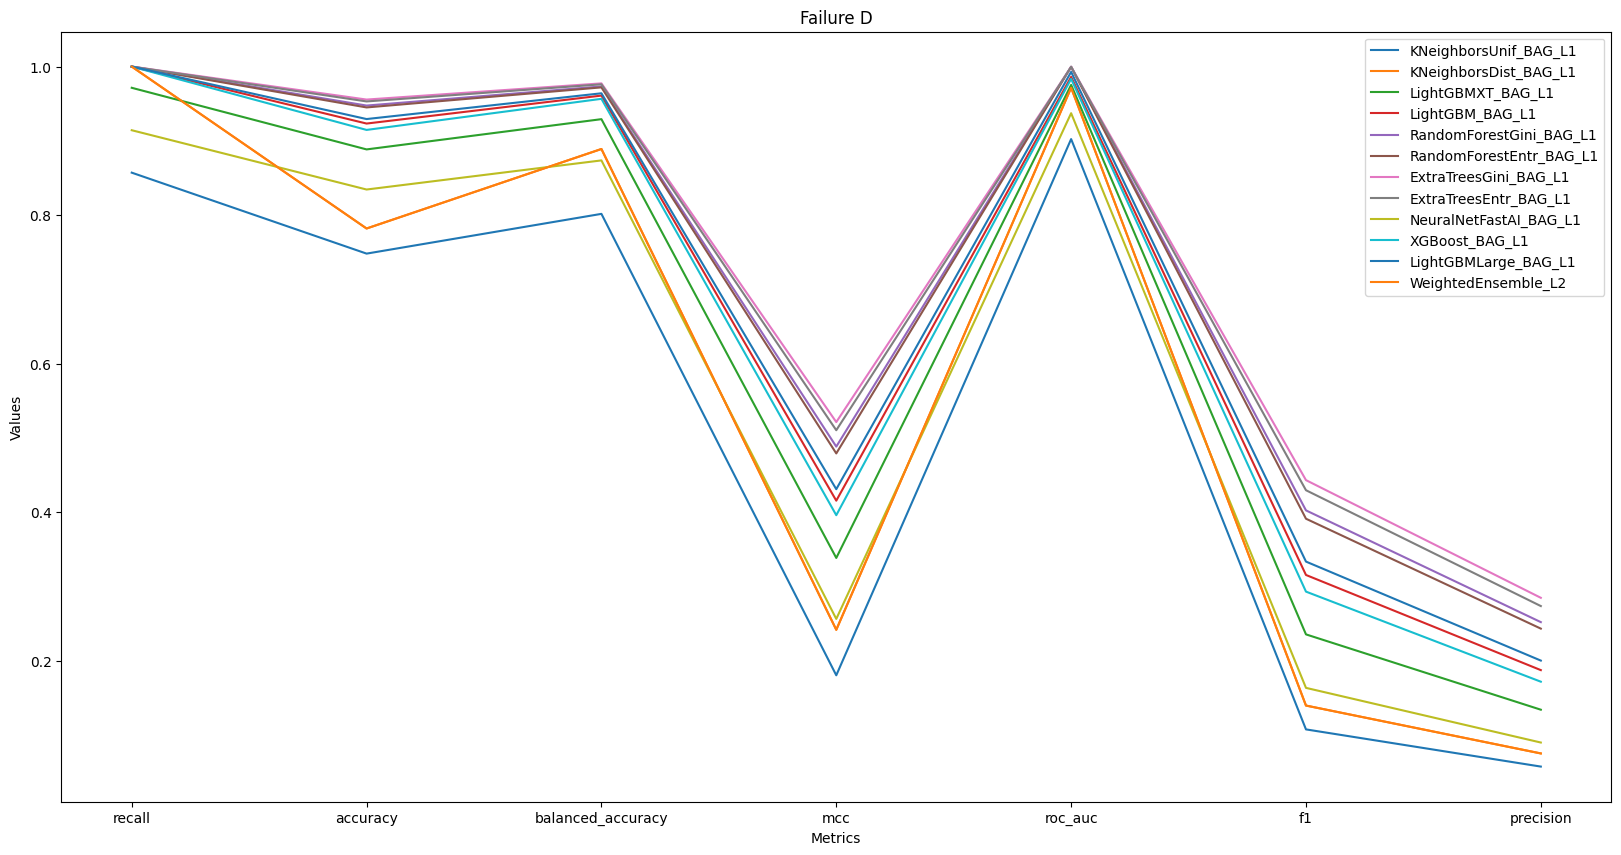

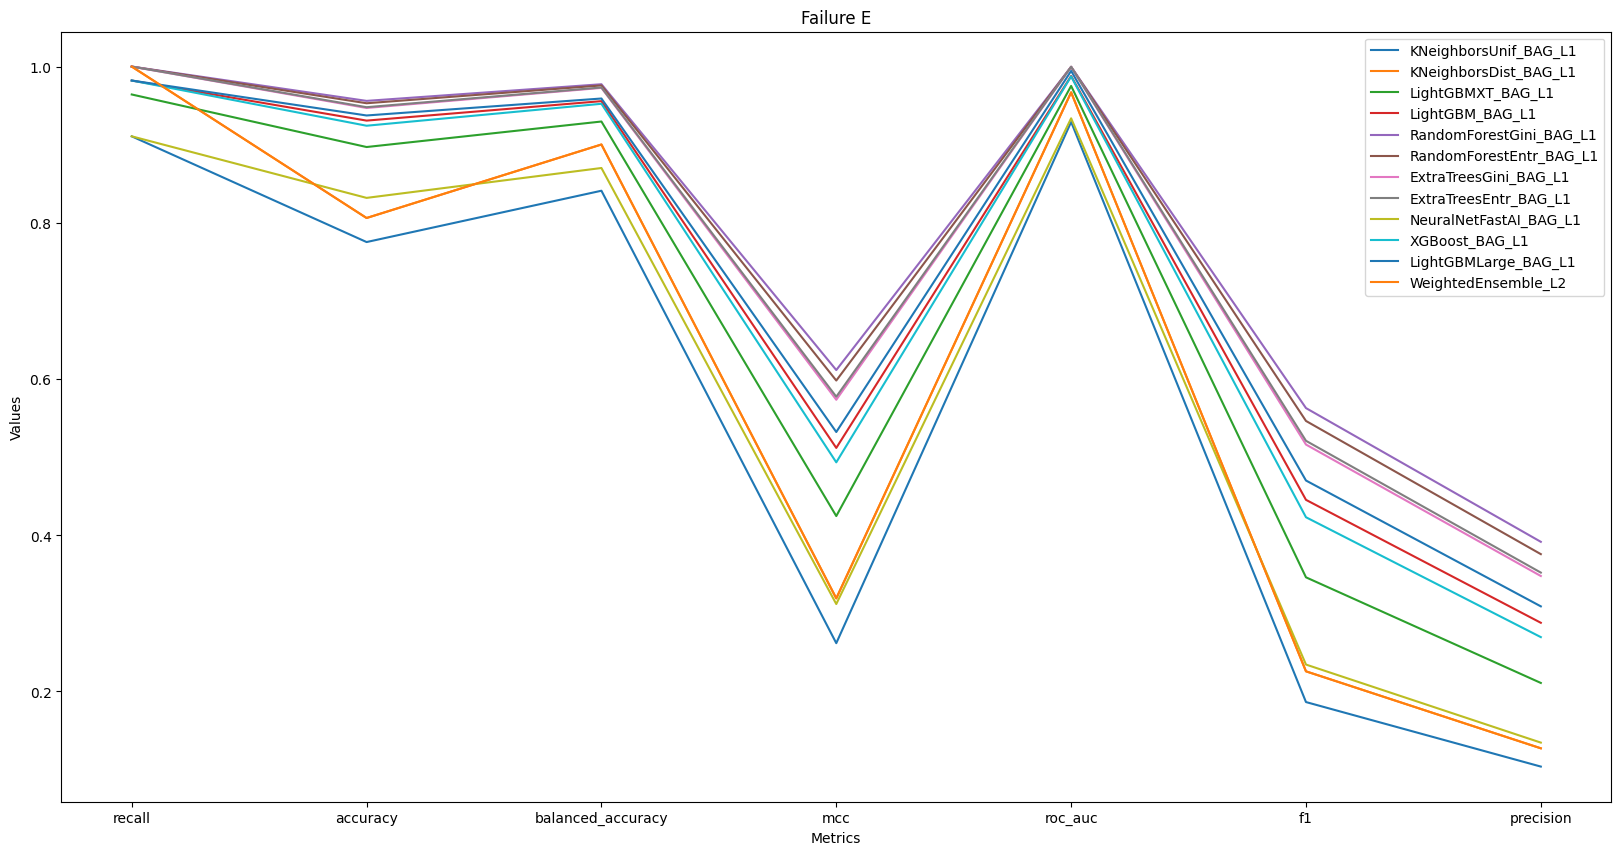

In [568]:
# line polt showing all models performance in each label-training.
import matplotlib.pyplot as plt

for label, perf in perfs.items():

    fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_xticklabels(metrics, rotation=20)
    
    for model, metrics in perf.items():
        x = list(metrics.keys())  # use metrics as x-axis
        y = list(metrics.values())  # use values as y-axis
        plt.plot(x, y, label=model)
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title(label)
    plt.legend()
    plt.show()

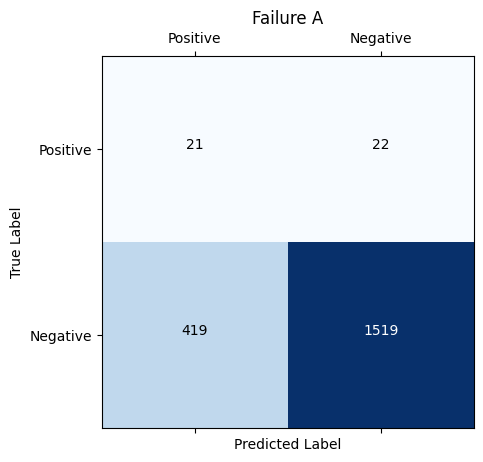

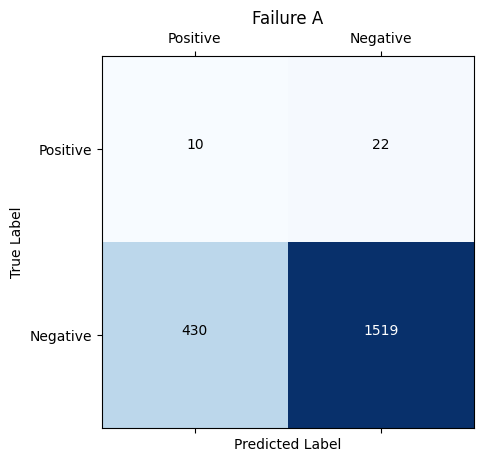

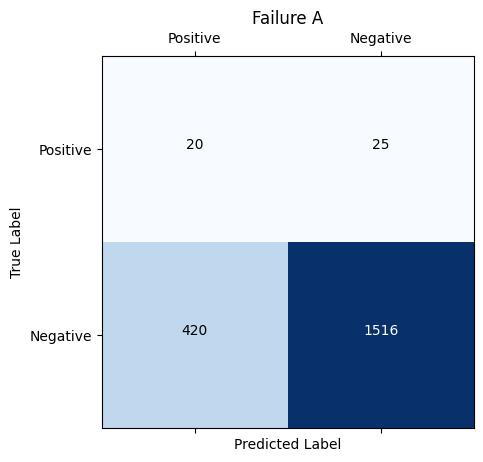

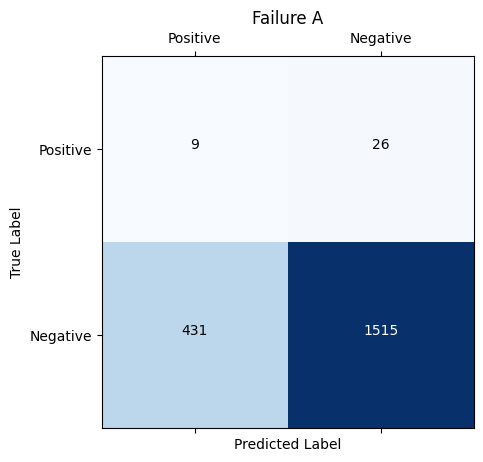

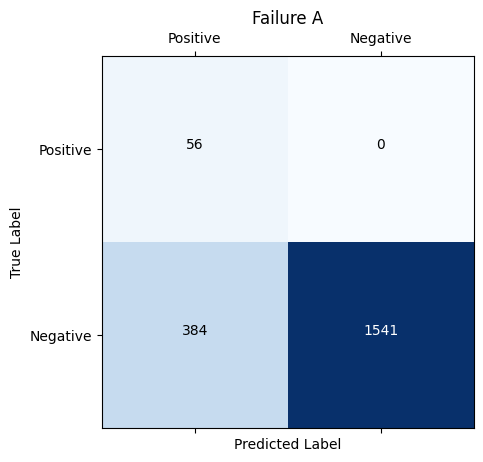

In [569]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


for label, best_model in best_models.items():
    
    # make predictions using the model
    y_pred = predictor.predict(test_df, model=best_model)

    y_true = test_df[label]
    
    # Assume y_true and y_pred are the true labels and predicted labels respectively
    cnf_matrix = confusion_matrix(y_true, y_pred, labels=[1, 0])

    # Plot the confusion matrix using matshow
    plt.matshow(cnf_matrix, cmap=plt.cm.Blues)

    # Add labels and title
    plt.title(label)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    plt.xticks([0, 1], ["Positive", "Negative"])
    plt.yticks([0, 1], ["Positive", "Negative"])
    
    # Add values to each cell of the matrix
    for i in range(cnf_matrix.shape[0]):
        for j in range(cnf_matrix.shape[1]):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > cnf_matrix.max()/2 else "black")

    # Show the plot
    plt.show()

In [570]:
print(model_gps)

{'Failure A': ['KNeighborsUnif_BAG_L1', 'KNeighborsDist_BAG_L1', 'LightGBMXT_BAG_L1', 'LightGBM_BAG_L1', 'RandomForestGini_BAG_L1', 'RandomForestEntr_BAG_L1', 'ExtraTreesGini_BAG_L1', 'ExtraTreesEntr_BAG_L1', 'NeuralNetFastAI_BAG_L1', 'XGBoost_BAG_L1', 'LightGBMLarge_BAG_L1', 'WeightedEnsemble_L2'], 'Failure B': ['KNeighborsUnif_BAG_L1', 'KNeighborsDist_BAG_L1', 'LightGBMXT_BAG_L1', 'LightGBM_BAG_L1', 'RandomForestGini_BAG_L1', 'RandomForestEntr_BAG_L1', 'ExtraTreesGini_BAG_L1', 'ExtraTreesEntr_BAG_L1', 'NeuralNetFastAI_BAG_L1', 'XGBoost_BAG_L1', 'LightGBMLarge_BAG_L1', 'WeightedEnsemble_L2'], 'Failure C': ['KNeighborsUnif_BAG_L1', 'KNeighborsDist_BAG_L1', 'LightGBMXT_BAG_L1', 'LightGBM_BAG_L1', 'RandomForestGini_BAG_L1', 'RandomForestEntr_BAG_L1', 'ExtraTreesGini_BAG_L1', 'ExtraTreesEntr_BAG_L1', 'NeuralNetFastAI_BAG_L1', 'XGBoost_BAG_L1', 'LightGBMLarge_BAG_L1', 'WeightedEnsemble_L2'], 'Failure D': ['KNeighborsUnif_BAG_L1', 'KNeighborsDist_BAG_L1', 'LightGBMXT_BAG_L1', 'LightGBM_BAG_

In [571]:
print(best_models)

{'Failure A': 'WeightedEnsemble_L2', 'Failure B': 'WeightedEnsemble_L2', 'Failure C': 'WeightedEnsemble_L2', 'Failure D': 'WeightedEnsemble_L2', 'Failure E': 'WeightedEnsemble_L2'}


In [572]:
print(perfs['Failure A']['WeightedEnsemble_L2'])

{'recall': 1.0, 'accuracy': 0.9626451287228672, 'balanced_accuracy': 0.980908152734778, 'mcc': 0.5945486051539611, 'roc_auc': 0.9994240046079632, 'f1': 0.5375, 'precision': 0.36752136752136755}


In [573]:
print(leaderboards)

{'Failure A':                       model  score_val  pred_time_val   fit_time  \
0     KNeighborsDist_BAG_L1   0.995556       0.040890   0.007979   
1   RandomForestGini_BAG_L1   0.995556       0.167555   0.692147   
2     ExtraTreesGini_BAG_L1   0.995556       0.214427   0.905582   
3     ExtraTreesEntr_BAG_L1   0.995556       0.215422   1.030651   
4       WeightedEnsemble_L2   0.995556       0.219412   1.974127   
5   RandomForestEntr_BAG_L1   0.995556       0.229389   0.757969   
6           LightGBM_BAG_L1   0.989333       0.022938  17.234170   
7            XGBoost_BAG_L1   0.989333       0.049864  27.083107   
8      LightGBMLarge_BAG_L1   0.988444       0.016956  53.192211   
9         LightGBMXT_BAG_L1   0.985778       0.064826  31.402210   
10   NeuralNetFastAI_BAG_L1   0.960000       0.144602  36.875241   
11    KNeighborsUnif_BAG_L1   0.944000       0.044881   0.006981   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.040890  

# Deploy

In [574]:
# Append predictions as columns to the test data or inference data

for label, best_model in best_models.items():    
    # make predictions using the model
    y_pred = predictor.predict(test_df, model=best_model)
    test_df = pd.concat([test_df, y_pred], axis=1, join='inner').rename(columns={label: label + '_pred'})

# Export the result to csv
test_df.to_csv('test_result.csv')

In [575]:
test_df.head(20)

,Model,Temperature,RPM,Usage,Fuel consumption,Membership,age,country_China,country_U.S,Failure A_pred,Failure B_pred,Failure C_pred,Failure D_pred,Failure E_pred,Failure E_pred,Failure E_pred,Failure E_pred,Failure E_pred,Failure E_pred
2497,5,4.706824,-0.099157,1,0.817096,0,11,1,0,0,0,0,0,0,0,0,0,0,0
9899,3,4.705016,0.262813,2,-0.514891,1,9,1,0,0,0,0,0,0,0,0,0,0,0
2744,3,4.709530,0.452151,1,-1.136372,2,8,1,0,0,0,0,0,0,0,0,0,0,0
6926,7,4.724729,-0.678308,1,1.500211,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3203,5,4.713127,-0.032332,1,-0.138237,1,1,0,0,0,0,0,0,0,1,1,1,1,1
2678,3,4.710531,-0.511245,2,-1.355516,1,1,0,1,0,0,0,0,0,1,1,1,1,1
3398,3,4.730039,0.758433,1,-0.026952,1,5,0,0,0,0,0,0,0,0,0,0,0,0
880,5,4.700985,-1.691823,2,1.335853,1,4,0,1,0,0,0,0,1,1,1,1,1,1
2322,3,4.706824,-0.138138,0,-1.314427,1,10,1,0,0,0,0,0,0,0,0,0,0,0
7870,5,4.717606,-1.368835,2,0.080908,2,2,0,0,0,0,0,0,0,0,0,0,0,0
